In [0]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.special import factorial
from scipy import stats
import warnings

warnings.simplefilter('ignore')

%matplotlib inline

# Задача №1

(К теоретической задаче 1) \\
Сгенерируйте $M=100$ выборок $X_1, ..., X_{1000}$ из равномерного распределения на отрезке $[0, \theta]$ (возьмите три произвольных положительных значения $\theta$). Для каждой выборки $X_1,\ldots,X_n$ для всех $n \leqslant 1000$ посчитайте оценки параметра $\theta$ из теоретической задачи: $2 \overline{X}, (n + 1) X_{(1)}, X_{(1)} + X_{(n)}, \frac {n + 1} {n} X_{(n)}$. Посчитайте для всех полученых оценок $\hat\theta$ квадратичную функцию потерь $(\hat\theta-\theta)^2$ и для каждого фиксированного $n$ усредните по выборкам. Для каждого из трех значений $\theta$ постройте графики усредненных функций потерь в зависимости от $n$.

Обозначим функцию генерирующую по выборке $X_1,\ldots,X_n$ для всех $n \leqslant 1000$ оценку параметра $\theta$:


*   $2 \overline{X}$: $\verb|gen_double_mean|$
*   $(n + 1) X_{(1)}$: $\verb|gen_mean_plus_last|$
*   $X_{(1)} + X_{(n)}$: $\verb|gen_multi_first|$
*   $\frac {n + 1} {n} X_{(n)}$: $\verb|gen_frac_last|$

А также определим значения параметра $\theta$


In [0]:
N, M = 10**3, 10**2
thetas = np.array([1, 5, 10])

def gen_est_double_mean(sample):
    return 2 * np.add.accumulate(sample) / np.arange(1, N+1)

def gen_est_multi_first(sample):
    return np.minimum.accumulate(sample) * np.arange(2, N+2)
    
def gen_est_first_plus_last(sample):
    return np.minimum.accumulate(sample) + np.maximum.accumulate(sample)

def gen_est_frac_last(sample):
    return np.maximum.accumulate(sample) * np.arange(2, N+2) / np.arange(1, N+1)

Сгенерируйте $M=100$ выборок $X_1, ..., X_{1000}$ из равномерного распределения на отрезке $[0, \theta]$

In [0]:
rvs_parametric = {
    param: stats.uniform(loc=0, scale=param).rvs(size=(M, N))
    for param in thetas
}

Определим функцию $\verb|calc_square_error|$, которая будет считать оценку $\hat\theta$ для каждого значения параметра $\theta$ для всех выборок, а по ней квадратичную функцию потерь $(\hat\theta-\theta)^2$ и усредняет по выборкам для каждого фиксированного $n$.

In [0]:
def calc_square_error(param, gen_estimation):
    global rvs_parametric
    estimations = np.apply_along_axis(gen_estimation, 1, rvs_parametric[param])
    sq_loss = np.square(estimations - np.full(estimations.shape, param)).mean(0)
    return sq_loss

Также определим функцию для построения графика усредненных функций потерь в зависимости от $n$ для каждого из трех значений $\theta$.

In [0]:
def show_plot_by_est(gen_estimation, ylim):
    global rvs_parametric
    plt.figure(figsize=(20, 10))
    plt.title("Модуль разности оценки и истинного значения θ")
    plt.xlabel('$1\leq n \leq N$')
    plt.ylabel('$(\\hat\\theta-\\theta)^2$')
    for param in rvs_parametric.keys():
        plt.plot(
          np.linspace(0, N, N),
          calc_square_error(param, gen_estimation),
          label=f'$\\theta={param}$'
        )
    plt.ylim(top=ylim)
    plt.grid(ls=':')
    plt.legend()
    plt.show()

#### Построим соответствующие графики для каждой оценки:

##### $2 \overline{X}$

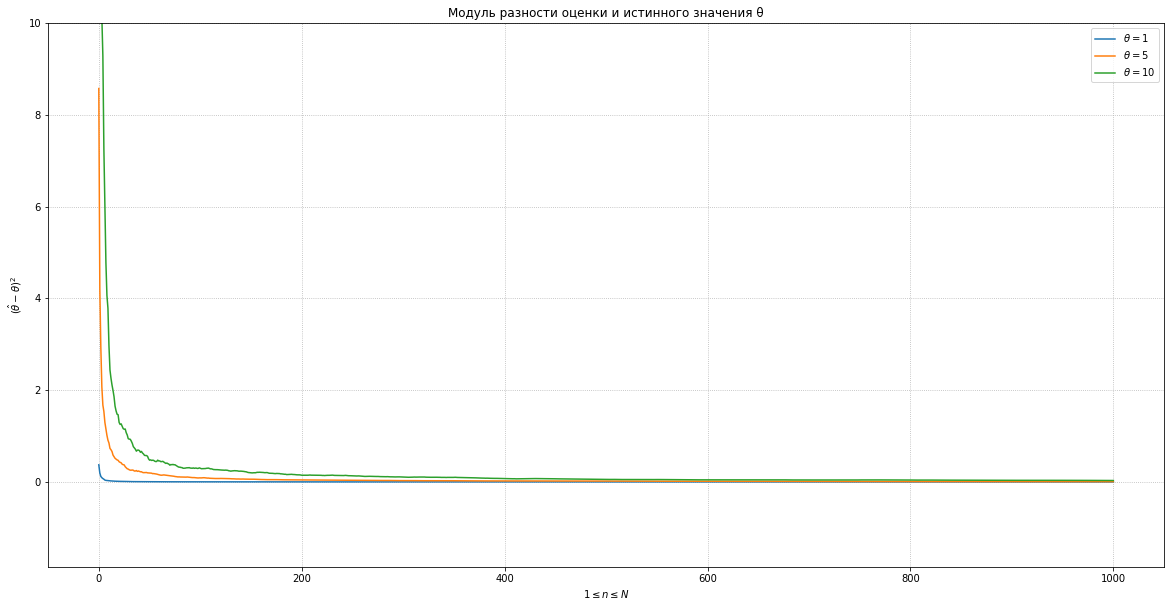

In [0]:
show_plot_by_est(gen_est_double_mean, 10)

##### $(n + 1) X_{(1)}$

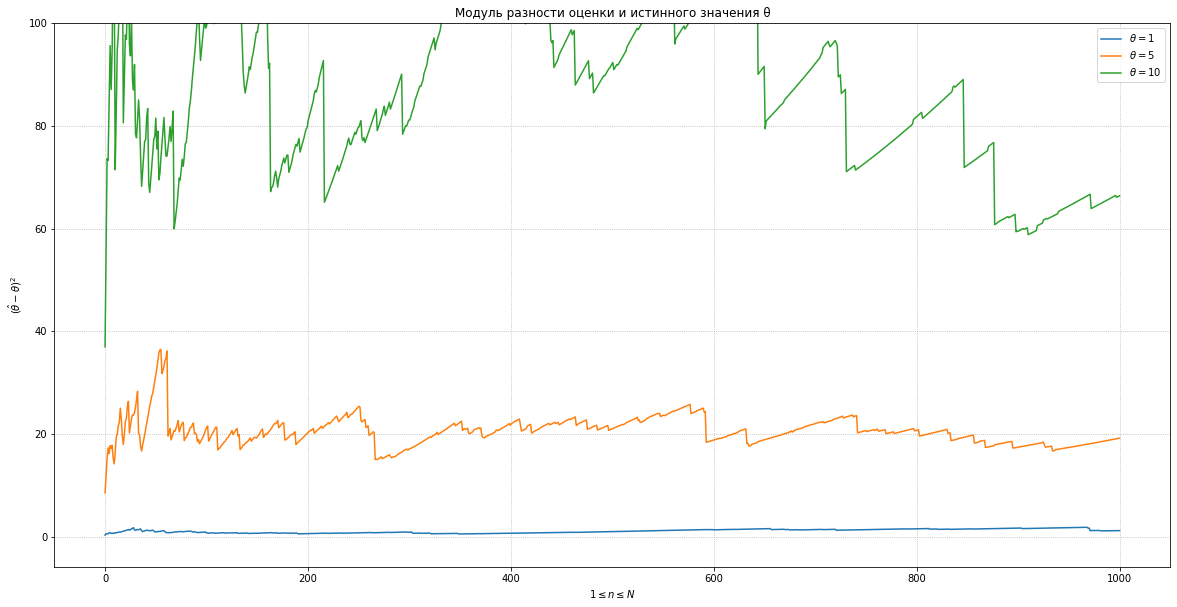

In [0]:
show_plot_by_est(gen_est_multi_first, 100)

##### $X_{(1)} + X_{(n)}$

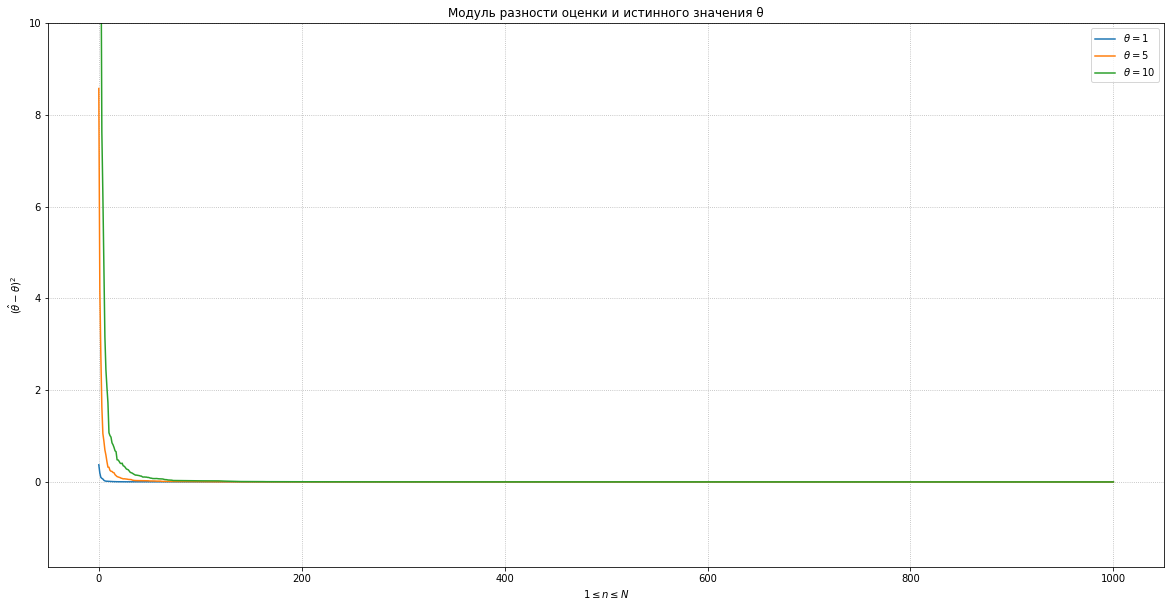

In [0]:
show_plot_by_est(gen_est_first_plus_last, 10)

##### $\frac {n + 1} {n} X_{(n)}$

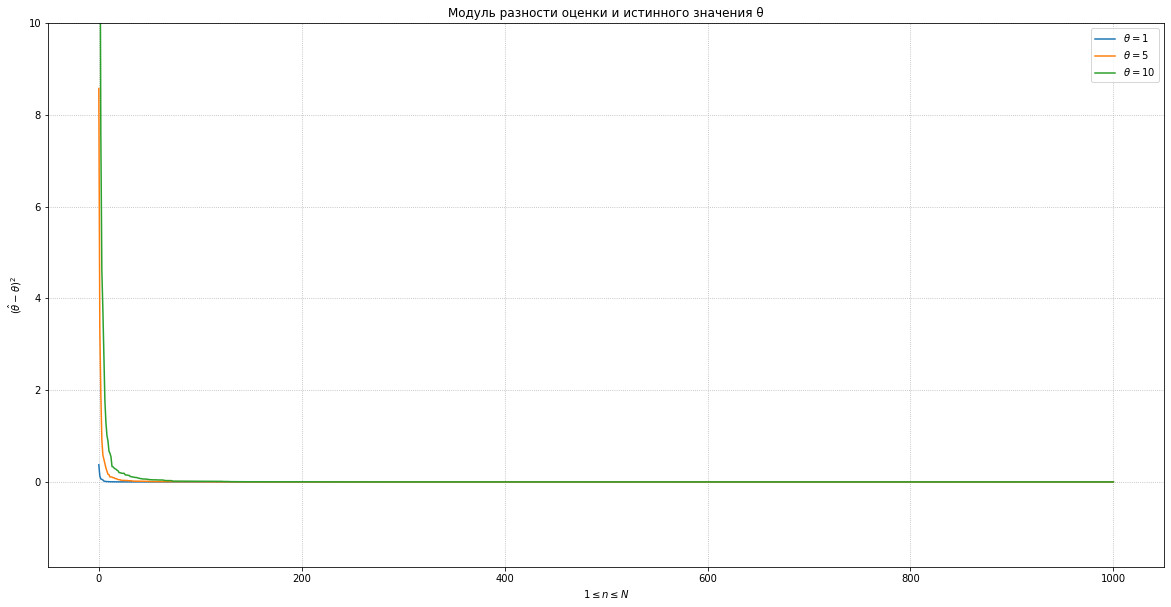

In [0]:
show_plot_by_est(gen_est_frac_last, 10)

А теперь определим функцию для построения графика усредненных функций потерь в зависимости от $n$ для каждого оценки от одного и того же $\theta$.

In [0]:
def show_plot_by_theta(param):
    global rvs_parametric
    plt.figure(figsize=(20, 10))
    plt.title(f"Модуль разности оценки и истинного значения θ={param}")
    plt.xlabel('$1\leq n \leq N$')
    plt.ylabel('$(\\hat\\theta-\\theta)^2$')
    plt.plot(
      np.linspace(0, N, N),
      calc_square_error(param, gen_est_double_mean),
      label='$2 \overline{X}$'
    )
    plt.plot(
      np.linspace(0, N, N),
      calc_square_error(param, gen_est_multi_first),
      label='$(n + 1) X_{(1)}$'
    )
    plt.plot(
      np.linspace(0, N, N),
      calc_square_error(param, gen_est_first_plus_last),
      label='$X_{(1)} + X_{(n)}$'
    )
    plt.plot(
      np.linspace(0, N, N),
      calc_square_error(param, gen_est_frac_last),
      label='$\\frac {n + 1} {n} X_{(n)}$'
    )
    plt.grid(ls=':')
    plt.legend()
    plt.show()

#### Построим соответствующие графики для каждого значения параметра

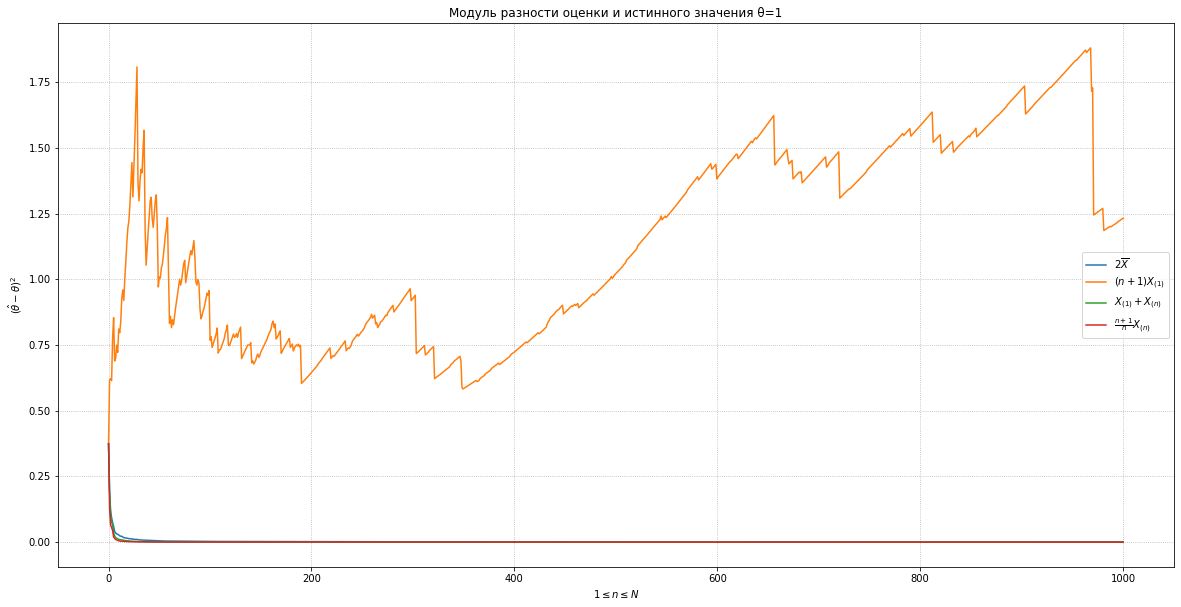

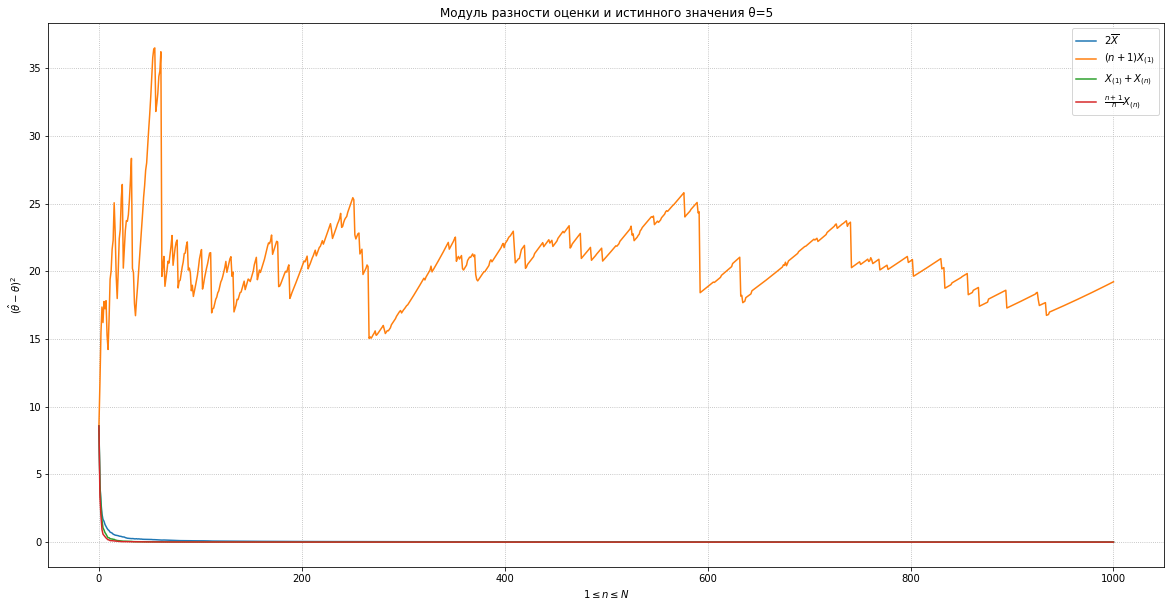

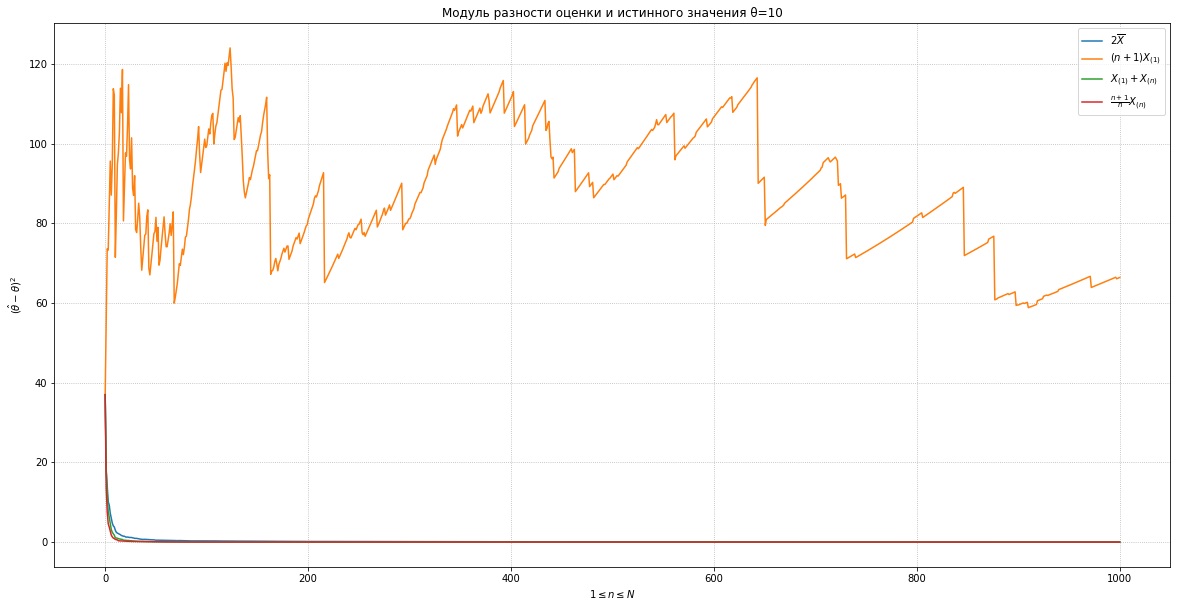

In [0]:
for theta in thetas:
    show_plot_by_theta(theta)

Как видим, оценка $(n+1)X_{(1)}$ не является состоятельной, на практике видно, что она значительно отличается от теоретического значения параметра, следовательно далее, уберем из рассмотрения эту оценку. И перестроим графики.

In [0]:
def show_plot_by_theta_fixed(param, ylim):
    global rvs_parametric
    plt.figure(figsize=(20, 10))
    plt.title(f"Модуль разности оценки и истинного значения θ={param}")
    plt.xlabel('$1\leq n \leq N$')
    plt.ylabel('$(\\hat\\theta-\\theta)^2$')
    plt.plot(
      np.linspace(0, N, N),
      calc_square_error(param, gen_est_double_mean),
      label='$2 \overline{X}$'
    )
    plt.plot(
      np.linspace(0, N, N),
      calc_square_error(param, gen_est_first_plus_last),
      label='$X_{(1)} + X_{(n)}$'
    )
    plt.plot(
      np.linspace(0, N, N),
      calc_square_error(param, gen_est_frac_last),
      label='$\\frac {n + 1} {n} X_{(n)}$'
    )
    plt.grid(ls=':')
    plt.ylim(top=ylim)
    plt.legend()
    plt.show()

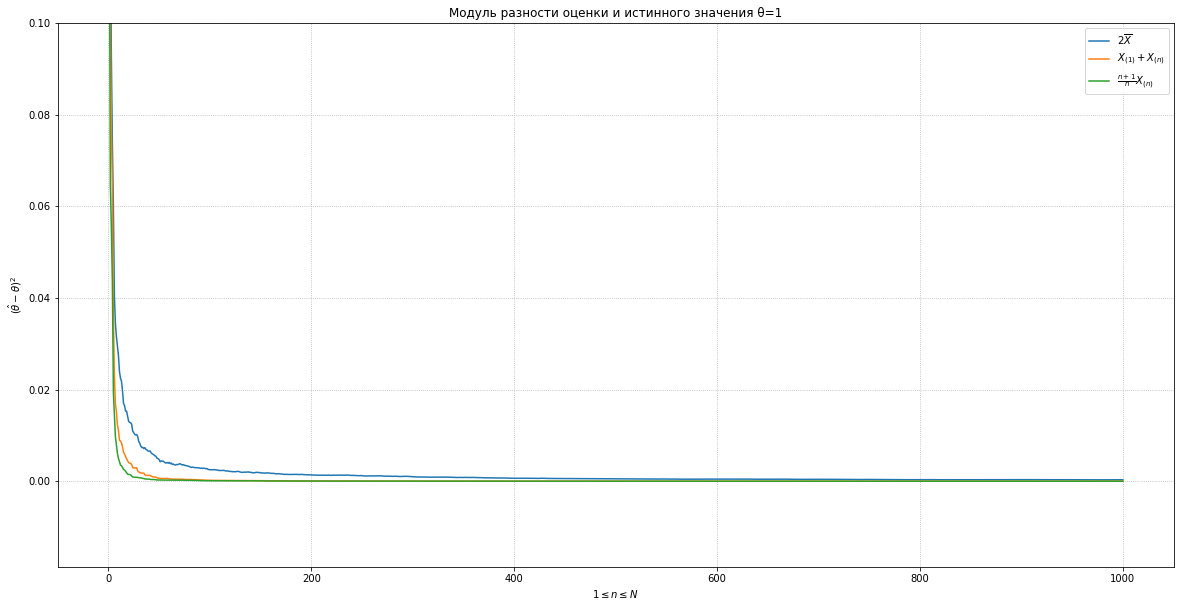

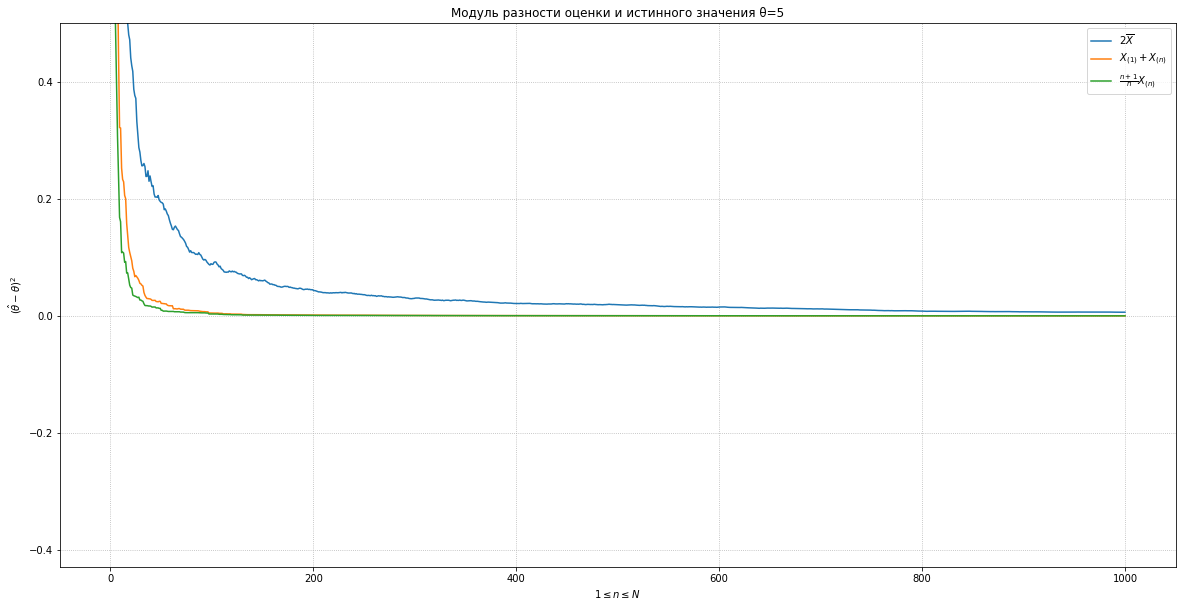

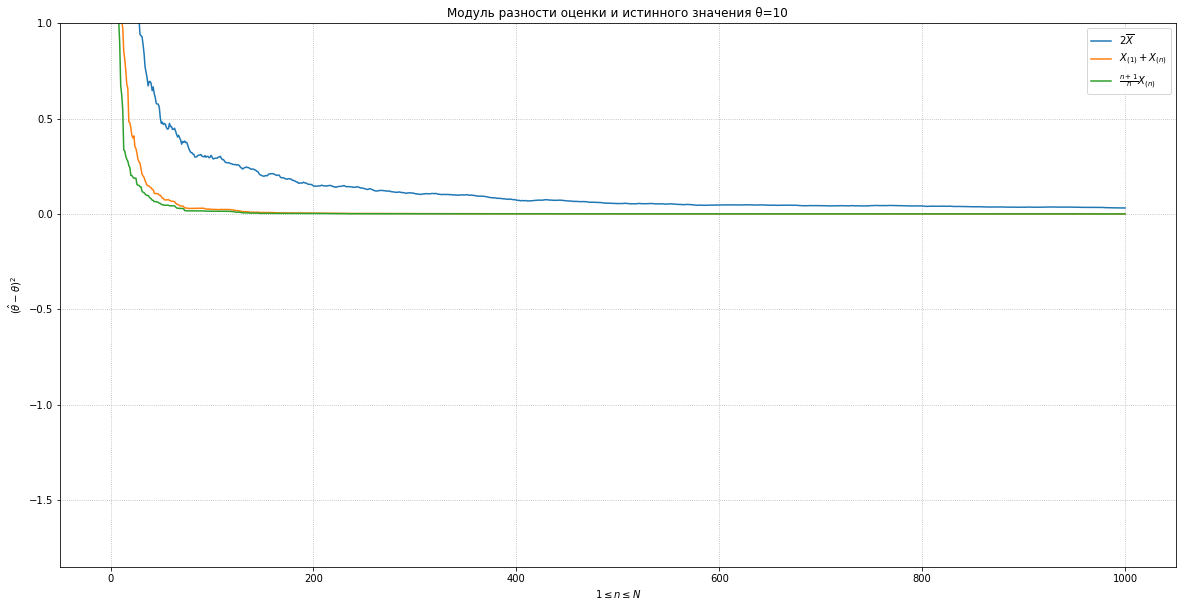

In [0]:
for theta in thetas:
    show_plot_by_theta_fixed(theta, theta/10)

# Вывод №1


Ранее, в теоретической задаче было доказано, что для выборки равномерного распределения $U[0,\theta]$ сравнимы следующие оценки параметра $\theta$ в подходе с квадратичной функцией потерь. Причем получено, что оценка $\frac{n+1}{n}X_{(n)}$ лучше оценки $2\overline{X}$ в квадратичном подходе, что легко видеть на построенных графиках. Также исходя из графиков, можно сказать, что в равномерном подходе с квадратичной функцией потерь оценка $X_{(1)} + X_{(n)}$ хуже чем оценка $\frac{n+1}{n}X_{(n)}$, но лучше чем $2\overline{X}$. Хуже всех повела себя оценка $(n+1)X_{(1)}$, так как она не является состоятельной.

# Задача №2

(К теоретическим задачам 3, 4, 5) \\
В задаче требуется экспериментально проверить утверждение, что для любой несмещенной оценки $\widehat{\theta}(X)$ параметра $\theta$ выполнено неравенство Рао-Крамера 
$$\mathsf{D}_{\theta}\widehat{\theta} (X) \geqslant \frac {1} {I_X (\theta)}.$$ Cгенерируйте выборку $X_1, ..., X_N$, $N=1000$, из распределений в теоретических задачах (распределение Бернулли, экспоненциальное распределение и нормальное распределение с неизвестным математическим ожиданием). В случае биномиального распределения $m=50$, в случае нормального распределения с неизвестным математическим ожиданием $\sigma^2=2.1$. Второй параметр (единственный в случае экспоненциального распределения) выберите случайно из распределения $R[0,1]$. Для всех $n \leqslant N$ посчитайте значение эффективной оценки и бутстрепную оценку дисперсии для эффективной оценки (параметрический бутстреп, количество бутстрепных выборок равно $500,$ размер каждой равен $n$). Сделайте то же самое с другой несмещенной оценкой --- в задаче 3 возьмите $\frac{X_{1}}{m}$, в задаче 4 возьмите $\frac{n-1}{n\overline{X}}$, в задаче 5 возьмите выборочную медиану. Постройте графики зависимости бутстрепных оценок дисперсий от размера выборки $n$. Для каждой бутстрепной оценки постройте на том же графике кривую зависимости $\frac{1} {I_X(\theta)}$ от $n.$

Объявим необходимые константы и выберем значение для параметра $\theta$.

In [0]:
N, m, sigma_sq, brvs_size = 10**3, 50, 2.1, 500
theta = stats.uniform(loc=0, scale=1).rvs(size=1)[0]

In [0]:
calc_var = lambda x: x.var()

## Биномиальное распределение

Сгенерируем $500$ выборок из биномиального распределения:

In [0]:
binom_rvs = stats.binom(n=m, p=theta).rvs(size=(brvs_size, N))

В теоретическом домашнем задании было доказано, что эффективная оценка для биномиального распределения: $\frac{\overline{X}}{m}$. Подсчитаем бутстрепную оценку дисперсии для эффективной оценки с количеством бутстрепных выборок равным 500.

In [0]:
binom_eff_est = np.array([
    binom_rvs[i].cumsum() / np.arange(1, N+1) / m
    for i in range(brvs_size)])
binom_bootstrap_var_eff_est = np.apply_along_axis(calc_var, 0, binom_eff_est)

Предложенная для расмотрения несмещенная оценка: $\frac{X_{1}}{m}$. Подсчитаем бутстрепную оценку дисперсии для несмещенной оценки с количеством бутстрепных выборок равным 500.

In [0]:
binom_unbiased_est = np.array([
    binom_rvs[i][0] / np.arange(1, N+1) 
    for i in range(brvs_size)])
binom_bootstrap_var_unbiased_est = np.apply_along_axis(calc_var, 0, binom_unbiased_est)

Информация Фишера для биномиального распределения равна $I_{X}(\theta)=\frac{nm}{\theta(1-\theta)}$

In [0]:
binom_fisher_info = np.linspace(1, N, N) * m  / (theta*(1-theta))

Построим график

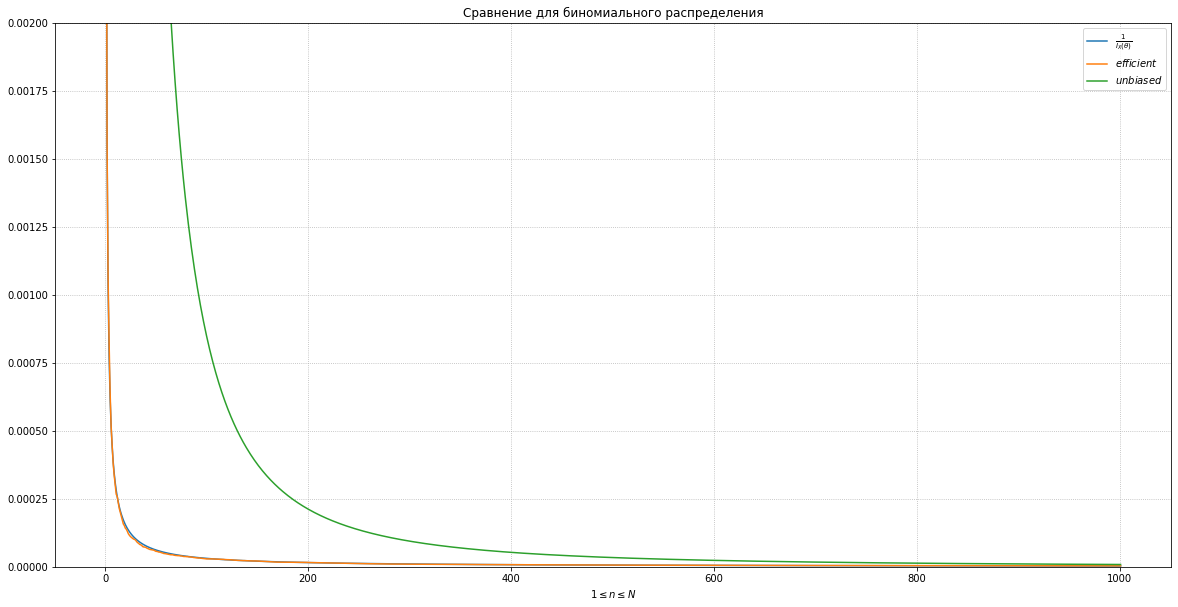

In [0]:
plt.figure(figsize=(20, 10))
plt.title(f"Сравнение для биномиального распределения")
plt.xlabel('$1\leq n \leq N$')
plt.plot(
  np.linspace(1, N+1, N),
  1 / binom_fisher_info,
  label='$\\frac{1}{I_{X}(\\theta)}$'
)
plt.plot(
  np.linspace(1, N+1, N),
  binom_bootstrap_var_eff_est,
  label='$efficient$'
)
plt.plot(
  np.linspace(1, N+1, N),
  binom_bootstrap_var_unbiased_est,
  label='$unbiased$'
)
plt.ylim(top=1)
plt.grid(ls=':')
plt.ylim(bottom=0, top=0.002)
plt.legend()
plt.show()

## Экспоненциальное распределение

Сгенерируем $500$ выборок из экспоненциального распределения:

In [0]:
expon_rvs = stats.expon(scale=theta).rvs(size=(brvs_size, N))

В теоретическом домашнем задании было доказано, что эффективная оценка для экспоненциального распределения: $\frac{1}{\overline{X}}$. Подсчитаем бутстрепную оценку дисперсии для эффективной оценки с количеством бутстрепных выборок равным 500.

In [0]:
expon_eff_est = np.array([
    1 / (expon_rvs[i].cumsum() / np.arange(1, N+1)) 
    for i in range(brvs_size)])
expon_bootstrap_var_eff_est = np.apply_along_axis(calc_var, 0, expon_eff_est)

Предложенная для расмотрения несмещенная оценка: $\frac{n-1}{n\overline{X}}$. Подсчитаем бутстрепную оценку дисперсии для несмещенной оценки с количеством бутстрепных выборок равным 500.

In [0]:
expon_unbiased_est = np.array([
    1 / expon_rvs[i].cumsum() * np.linspace(0, N-1, N)
    for i in range(brvs_size)])
expon_bootstrap_var_unbiased_est = np.apply_along_axis(calc_var, 0, expon_unbiased_est)

Информация Фишера для экспоненциального распределения равна $I_{X}(\theta)=\frac{n}{\theta^2}$

In [0]:
expon_fisher_info = np.linspace(1, N, N) / theta**2

Построим график

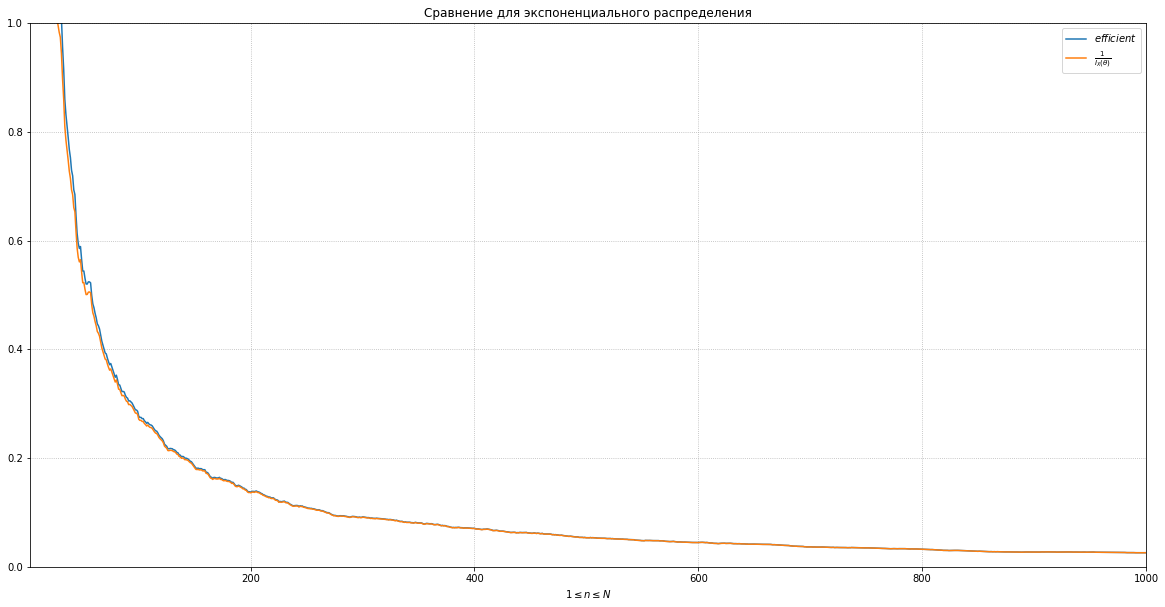

In [0]:
plt.figure(figsize=(20, 10))
plt.title(f"Сравнение для экспоненциального распределения")
plt.xlabel('$1\leq n \leq N$')
plt.plot(
  np.linspace(2, N+1, N-1),
  expon_bootstrap_var_eff_est[1:],
  label='$efficient$'
)
plt.plot(
  np.linspace(2, N+1, N-1),
  expon_bootstrap_var_unbiased_est[1:],
  label='$\\frac{1}{I_{X}(\\theta)}$'
)
plt.ylim(bottom=0, top=1)
plt.xlim(left=3, right=N)
plt.grid(ls=':')
plt.legend()
plt.show()

## Нормальное распределение

Сгенерируем $500$ выборок из нормального распределения:

In [0]:
norm_rvs = stats.expon(loc=theta, scale=sigma_sq**0.5).rvs(size=(brvs_size, N))

В теоретическом домашнем задании было доказано, что эффективная оценка для нормального распределения есть $\overline{X}$. Подсчитаем бутстрепную оценку дисперсии для эффективной оценки с количеством бутстрепных выборок равным 500.

In [0]:
norm_eff_est = np.array([
    1 / (norm_rvs[i].cumsum() / np.arange(1, N+1)) 
    for i in range(brvs_size)])
norm_bootstrap_var_eff_est = np.apply_along_axis(calc_var, 0, norm_eff_est)

Возьмем выборочную медиану. Подсчитаем бутстрепную оценку дисперсии для несмещенной оценки с количеством бутстрепных выборок равным 500.

In [0]:
norm_unbiased_est = np.array([
    [np.median(norm_rvs[i][:j+1]) for j in range(N)]
    for i in range(brvs_size)])
norm_bootstrap_var_unbiased_est = np.apply_along_axis(calc_var, 0, norm_unbiased_est)

Информация Фишера для нормального распределения равна $I_{X}(\theta)=\frac{n}{\sigma^2}$

In [0]:
norm_fisher_info = np.linspace(1, N, N) / sigma_sq

Построим график

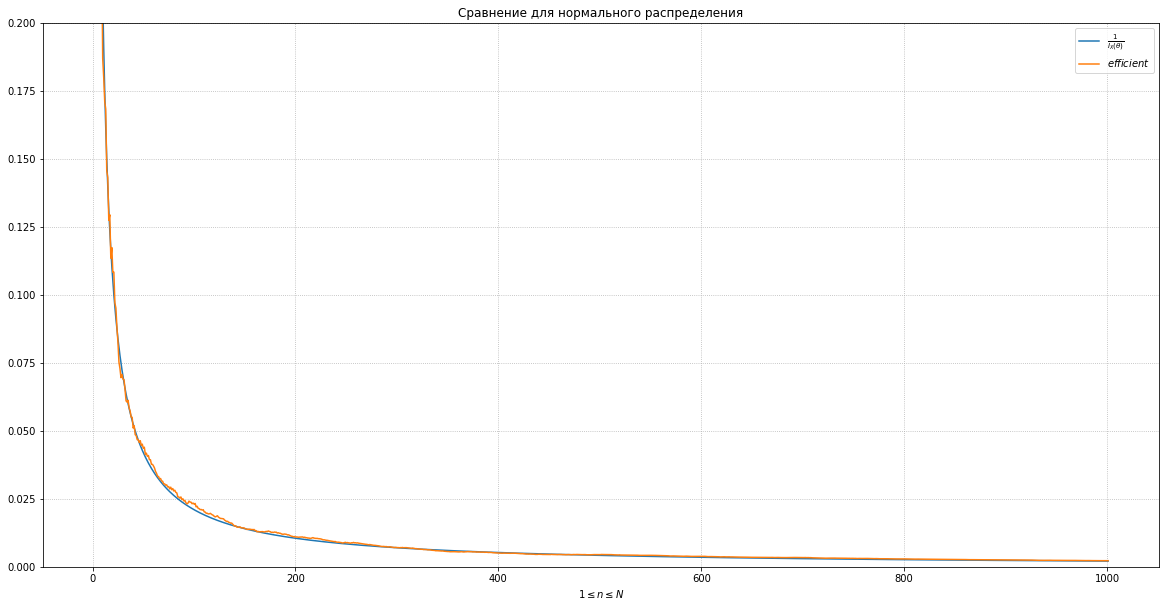

In [0]:
plt.figure(figsize=(20, 10))
plt.title(f"Сравнение для нормального распределения")
plt.xlabel('$1\leq n \leq N$')
plt.plot(
  np.linspace(1, N+1, N),
  1 / norm_fisher_info,
  label='$\\frac{1}{I_{X}(\\theta)}$'
)
plt.plot(
  np.linspace(1, N+1, N),
  norm_bootstrap_var_unbiased_est,
  label='$efficient$'
)
plt.grid(ls=':')
plt.ylim(bottom=0, top=0.2)
plt.legend()
plt.show()

# Вывод №2

На практике была проверена выполнимость неравенства Рао-Крамера на примере трёх различных распределений: биномиального, экспоненциального и нормального. В частности, нетрудно было заметить, что эффективные оценки достигают равенства в неравенстве Рао-Крамера (напомню, что эффективной оценкой в классе несмещенных оценок называется оценка, дающая равенство в неравенстве).

# Задача №3

Рассмотрим $X_1, ..., X_n \sim Bern(\theta)$. По сетке значений $\theta \in [0, 1]$ с шагом 0.01 постройте график зависимости нижней оценки дисперсии произвольной несмещенной оценки из неравенства Рао-Крамера от $\theta$. Какой можно сделать вывод (напишите в комментариях)? Для каждого значения $\theta$ (для той же сетки) сгенерируйте выборку размера $n=1000$ для параметра $\theta$ посчитайте эффективную оценку $\theta$ и бутстрепную оценку дисперсии (параметрический бутстреп, количество бутстрепных выборок равно $500$) этой эффективной оценки $\theta$. Нарисуйте график зависимости полученных бутстрепных оценок от $\theta$.

In [0]:
sample_size, samples_amount = 10**3, 10**2

Знаем, что информация Фишера для Бернулиевского распределения равна $i=\frac{1}{\theta\cdot(1-\theta)}$ (как частный случай биномиального распределения), тогда  $\frac{1} {I_X (\theta)}$ - нижняя оценка дисперсии несмещенной оценки по неравенству Рао-Крамера. В силу того, что $I_X (\theta) = n\cdot i$, получаем:
$$\mathsf{D}_{\theta}\widehat{\theta} (X) \geqslant \frac {n} {\theta\cdot(1-\theta)}.$$
  
Наконец, построим график:

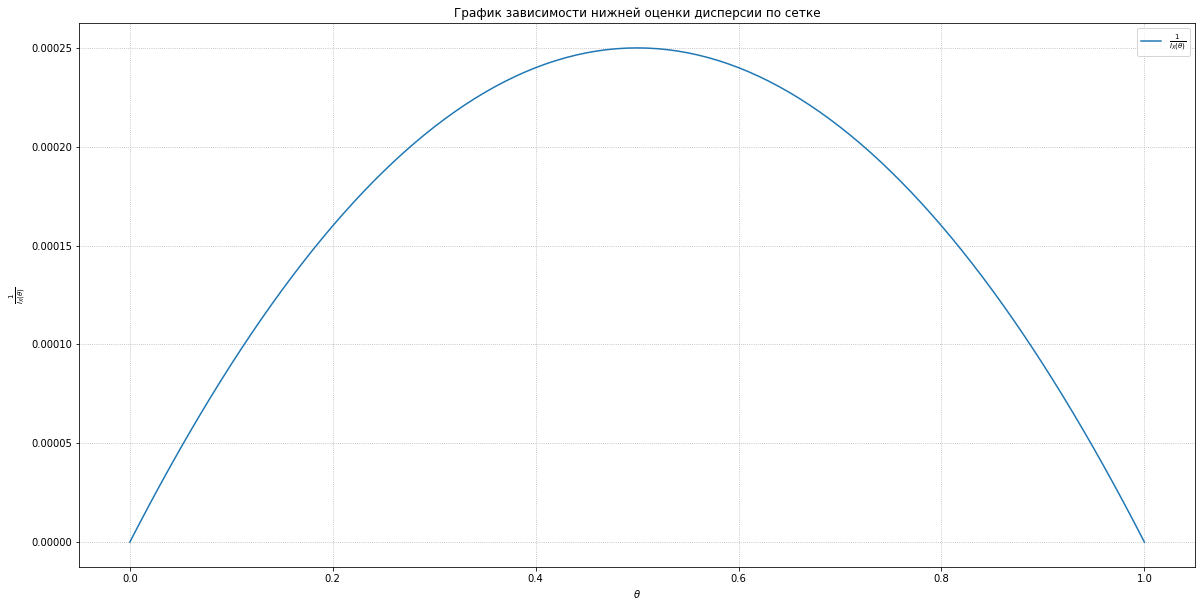

In [0]:
probe_params = np.arange(0, 1.01, 0.01)
low_est = probe_params * (1 - probe_params) / sample_size
plt.figure(figsize=(20, 10))
plt.title('График зависимости нижней оценки дисперсии по сетке')
plt.xlabel('$\\theta$')
plt.ylabel('$\\frac{1}{I_X(\\theta)}$')
plt.plot(probe_params, low_est, label='$\\frac{1}{I_X(\\theta)}$')
plt.grid(ls=':')
plt.legend()
plt.show()

Согласно графику видно, что максимум нижней оценке достигается при $\theta=0.5$, что есть ожидаемым согласно аналитических рассуждений о максимуме перевернутой параболы.

Напишем функцию, которая для каждого значения $\theta$ (для той же сетки) сгенерирует выборку размера  $n=1000$  для параметра  $\theta$, посчитает эффективную оценку $\theta$ и бутстрепную оценку дисперсии этой эффективной оценки $\theta$.  

Заметим, что выборочное среднее является эффективной оценкой параметра для Бернуллиевского распределения.

In [0]:
def compute_bootstrap_var_est(theta):
    global sample_size, samples_amount
    sample = stats.bernoulli.rvs(p=theta, size=sample_size)
    etheta = sample.mean()
    eff_est = lambda _: stats.bernoulli.rvs(p=etheta, size=sample_size).mean()
    return np.fromiter(
      map(eff_est, np.arange(0, samples_amount, 1)),
      dtype=np.float64
    ).var()

Нарисуем график зависимости полученных бутстрепных оценок от $\theta$:

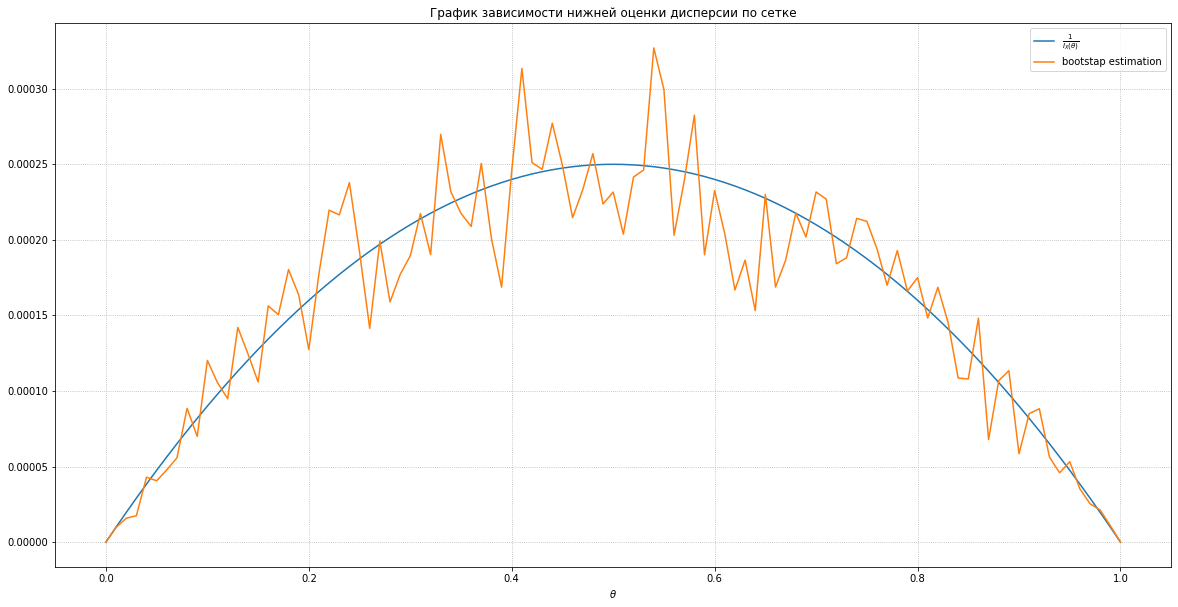

In [0]:
plt.figure(figsize=(20, 10))
plt.title('График зависимости нижней оценки дисперсии по сетке')
plt.xlabel('$\\theta$')
plt.plot(probe_params, low_est, label='$\\frac{1}{I_X(\\theta)}$')
plt.plot(
    probe_params,
    np.vectorize(compute_bootstrap_var_est)(probe_params),
    label='bootstap estimation'
)
plt.grid(ls=':')
plt.legend()
plt.show()

# Вывод №3

Согласно проведенных эксперименов и построенных по ним графикам легко видеть, что бутстрепная оценка дисперсии приближает нижнюю оценку дисперсии из неравенства Рао-Крамера, что говорит о ее эффективности при $n \rightarrow \infty$ (оценка называется эффективной, если для неё неравенство Рао-Крамера обращается в равенство).